# Case Study 3: colour images classification

In [42]:
import numpy as np
import matplotlib.pyplot as plt


## Convolutional Neural Networks (CNN)

Derived from the MLP, a convolutional neural network (CNN) is a type of artificial neural network that is specifically designed to process **pixel data**.  The layers of a CNN consist of an **input layer**, an **output layer** and **hidden layers** that can include **convolutional layers**, **pooling layers**, **fully connected layers** and **normalization layers**. It exists a lot of techniques to optimize CNN, like for example the dropout.

### Loading the dataset
We will use colour images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [43]:
from keras.datasets import cifar10

In [44]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data() #load cifar 10 dataset from keras

In [45]:
# Dim of our training data
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [46]:
# Display the first element of x_train
x_train[0]
# It is simply an array of numbers that corresponds to the pixel values(0-255)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [47]:
#y_train takes integer values between 0 and 9 where each number depicts one category.
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [86]:
# Define label
labels = ['Airplane', 'Automobile', 'Bird', 'Cat',
                  'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

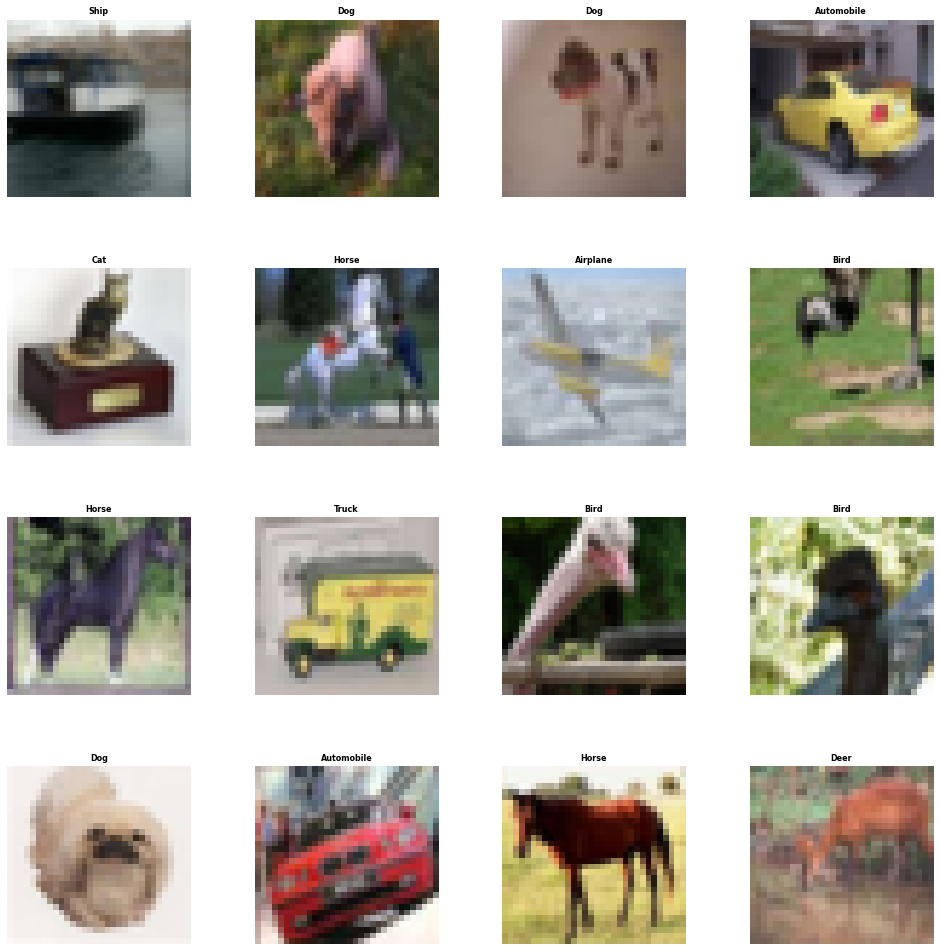

In [49]:
# Plot 16 random images from the training set and their corresponding class

# Let's view images in a grid format
# Define the dimensions of the plot grid 
W_grid = 4
L_grid = 4

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [50]:
# Rescale characteristics so that all the pixel values lie within 0 to 1
# Why?
# To ensure that the gradient descent moves smoothly 
# towards the minima and that the steps for gradient descent 
# are updated at the same rate for all the features 
# before feeding the data to the model
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## CNN model

In [51]:
# Create the model
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size = 2, padding = 'same',activation = 'relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size = 2, padding = 'same',activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [52]:
#Compile the model
model.compile(optimizer = 'rmsprop', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
# Configuration of the model with the optimizer, loss and metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [56]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5399 - accuracy: 0.4396
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2131 - accuracy: 0.5638
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0916 - accuracy: 0.6084
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0123 - accuracy: 0.6428
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9448 - accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9019 - accuracy: 0.6824
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8590 - accuracy: 0.6964
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8207 - accuracy: 0.7116
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7875 - accuracy: 0.7231
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [57]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy for the CNN:', test_acc)

313/313 - 1s - loss: 0.7919 - accuracy: 0.7321 - 1s/epoch - 4ms/step

Test accuracy for the CNN: 0.7321000099182129


## Using a pre-learned network

# ![title](vgg16.jpg)

### loading VGG-16 description part and adding layers to build our own classification network

In [59]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

VGGmodel = VGG16(weights='imagenet', include_top=False)
VGGmodel.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [70]:
from tensorflow.keras.models import Model, Sequential
from keras.layers import GlobalAveragePooling2D, Flatten

# we will add layers to this feature extraction part of VGG network
m = VGGmodel.output

#m = Flatten()
# we end with a global average pooling
m = GlobalAveragePooling2D()(m)
# and add a fully-connected layer
m = Dense(1024, activation='relu')(m)
# finally, the softmax layer for predictions (we have nbClasses classes)
predictions = Dense(10, activation='softmax')(m)

# global network
model = Model(inputs=VGGmodel.input, outputs=predictions)

from tensorflow.keras.optimizers import RMSprop
for layer in model.layers[:-2]:
    layer.trainable = False

Can you display the architecture of this entire network?

In [71]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

**[TO DO - Students] What would happen if we ran model.fit now ? Make it so that the training will only train the new layers and train the model.**

In [72]:
## Your code here
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1563/1563 [==============================] - 106s 67ms/step - loss: 1.3344 - accuracy: 0.5328 - val_loss: 1.2633 - val_accuracy: 0.5610
Epoch 2/3
1563/1563 [==============================] - 114s 73ms/step - loss: 1.1573 - accuracy: 0.5996 - val_loss: 1.1991 - val_accuracy: 0.5836
Epoch 3/3
1563/1563 [==============================] - 113s 72ms/step - loss: 1.0870 - accuracy: 0.6259 - val_loss: 1.2305 - val_accuracy: 0.5864


In [74]:
#`Evalauate the model
score = model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

313/313 [==============================] - 15s 48ms/step - loss: 1.2305 - accuracy: 0.5864
accuracy: 58.64%


C:\Users\JM_MAESO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


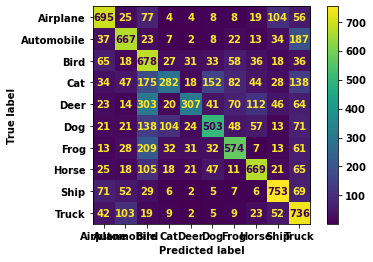

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)


y_pred=model.predict(x_test)

cm = confusion_matrix(le.inverse_transform(y_test), 
                      le.inverse_transform(np.argmax(y_pred,axis=1)), 
                      labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()

## Examples of reviews wrongly classified

In [120]:
incorrects = np.nonzero(np.argmax(y_pred,axis=1).reshape(-1,1) != y_test)

In [121]:
incorrects[0]

array([   3,    5,    7, ..., 9989, 9995, 9998], dtype=int64)

In [ ]:
print()

In [96]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

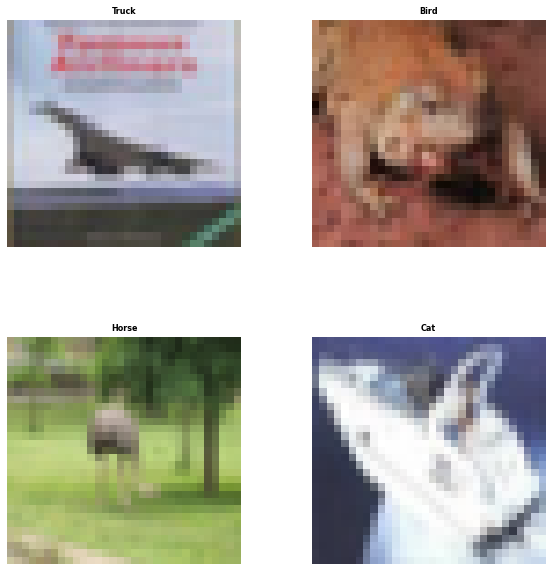

In [151]:
# Plot error on images

# Let's view images in a grid format
# Define the dimensions of the plot grid 
W_grid = 2
L_grid = 2

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() 


index = [3,5,9989,9995] #indices of errors

for i in np.arange(0, W_grid * L_grid): 
       
    # read and display an image with the selected index    
    axes[i].imshow(x_test[index[i],1:])
    label_index = int(np.argmax(y_pred,axis=1)[index[i]])
    label_index2 = int(y_test[index[i]])
    axes[i].set_title(labels[label_index], fontsize = 8)
    #axes[i].set_title(labels[label_index2], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)